In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.datasets import make_blobs

In [49]:
X, y = make_blobs(n_samples=100, centers=3, random_state=100)

In [50]:
X = pd.DataFrame(X)

In [51]:
y

array([0, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1,
       1, 2, 2, 1, 1, 1, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0,
       1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 1, 0])

<Axes: xlabel='0', ylabel='1'>

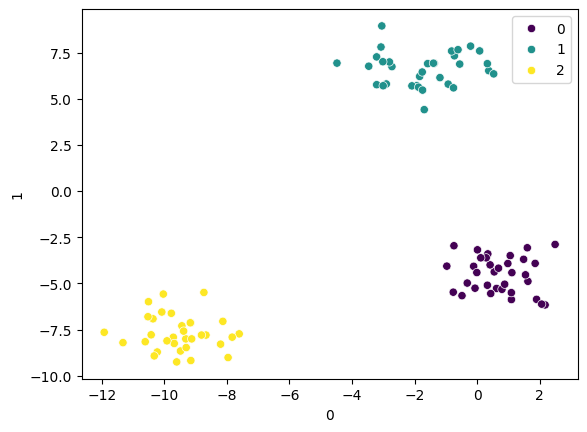

In [52]:
sns.scatterplot(x = X[0], y = X[1], hue = y, palette = 'viridis')

In [53]:
from sklearn.cluster import KMeans

In [54]:
km = KMeans(n_clusters=3)

In [55]:
km.fit(X)

KMeans(n_clusters=3)

In [56]:
km.predict(X)

array([1, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1,
       1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       2, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 1], dtype=int32)

<Axes: xlabel='0', ylabel='1'>

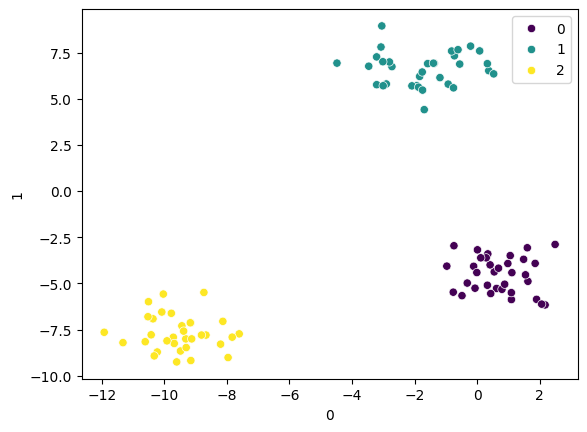

In [57]:
sns.scatterplot(x = X[0], y = X[1], hue = y, palette = 'viridis')

<Axes: xlabel='0', ylabel='1'>

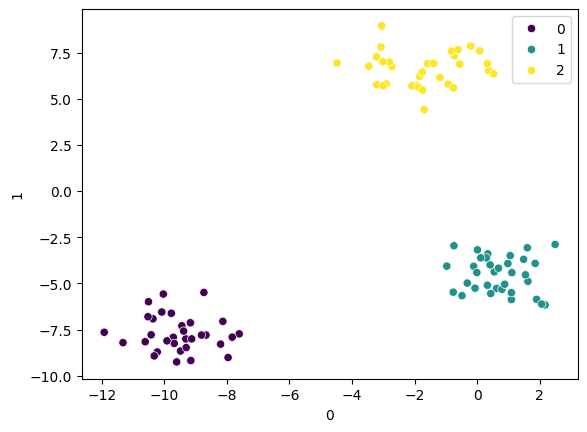

In [58]:
sns.scatterplot(x = X[0], y = X[1], hue = km.predict(X), palette = 'viridis')

In [59]:
km = KMeans(n_clusters=4)
km.fit(X)
pred = km.predict(X)

<Axes: xlabel='0', ylabel='1'>

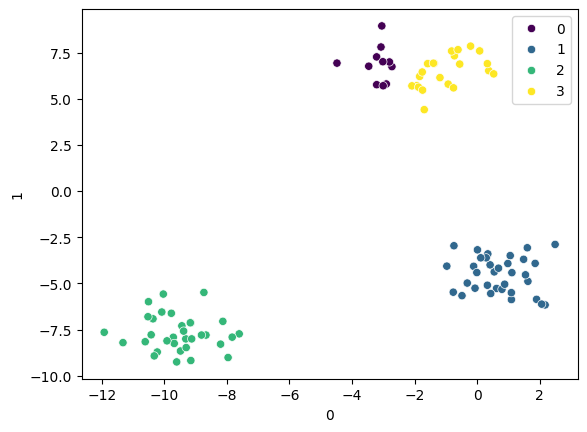

In [60]:
sns.scatterplot(x = X[0], y = X[1], hue = pred, palette = 'viridis')

In [61]:
km.inertia_

159.12527303505613

In [62]:
num_list = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    print(f'Cluster: {i}, Inertia: {km.inertia_}')
    num_list.append(km.inertia_)

Cluster: 1, Inertia: 5834.497201677221
Cluster: 2, Inertia: 2117.3888507324696
Cluster: 3, Inertia: 195.4001076475894
Cluster: 4, Inertia: 180.89798454729925
Cluster: 5, Inertia: 141.95542607097292
Cluster: 6, Inertia: 123.72166208738311
Cluster: 7, Inertia: 99.52240066230102
Cluster: 8, Inertia: 90.7140023674107
Cluster: 9, Inertia: 75.27100003187385
Cluster: 10, Inertia: 65.87737088766842


<Axes: >

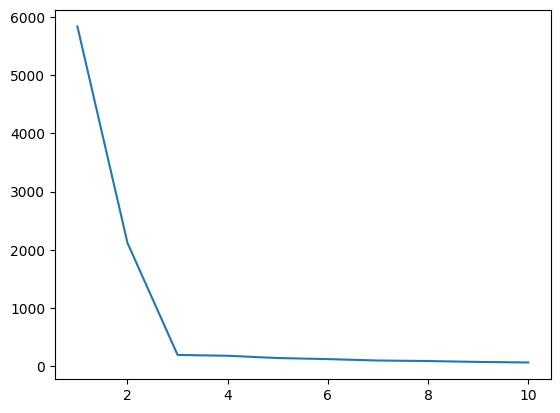

In [63]:
sns.lineplot(x= range(1, 11), y = num_list)

## 데이터 살펴보기

In [64]:
mkt_df = pd.read_csv('/content/drive/MyDrive/머신러닝 프로젝트/data/marketing.csv')

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
mkt_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0


**컬럼  **
*   ID: 고객 고유 식별자 (Unique identifier for each customer).
*   Year_Birth: 고객의 출생 연도 (Year of birth of the customer).
*   Education: 고객의 학력 수준 (Education level, e.g., 'Graduate', 'Undergraduate', etc.).
*   Marital_Status: 결혼 상태 (Marital status, e.g., 'Single', 'Married', etc.).
*   Income: 고객의 연간 수입 (Yearly income of the customer, typically in monetary units).
*   Kidhome: 집에 거주하는 어린이 수 (Number of children in the household).
*   Teenhome: 집에 거주하는 청소년 수 (Number of teenagers in the household).
*   Dt_Customer: 고객이 처음 등록한 날짜 (Date when the customer was enrolled in the system).
소비 및 최근 활동
*   Recency: 최근 구매 후 경과 일수 (Number of days since the customer's last purchase).
*   MntWines: 와인 제품 소비 금액 (Amount spent on wines).
*   MntFruits: 과일 제품 소비 금액 (Amount spent on fruits).
*   MntMeatProducts: 육류 제품 소비 금액 (Amount spent on meat products).
*   MntFishProducts: 생선 제품 소비 금액 (Amount spent on fish products).
*   MntSweetProducts: 과자/디저트 소비 금액 (Amount spent on sweets/desserts).
*   MntGoldProds: 금속 제품 소비 금액 (Amount spent on gold products or accessories).
구매 활동 데이터
*   NumDealsPurchases: 프로모션/할인 구매 횟수 (Number of purchases made with discounts).
*   NumWebPurchases: 온라인 구매 횟수 (Number of purchases made via the website).
*   NumCatalogPurchases: 카탈로그를 통한 구매 횟수 (Number of purchases made using catalog orders).
*   NumStorePurchases: 매장에서의 구매 횟수 (Number of purchases made directly in-store).
*   NumWebVisitsMonth: 지난 한 달 동안의 웹사이트 방문 횟수 (Number of times the customer visited the company's website in the last month).  
*   Complain: 고객 불만 여부 (Whether the customer has made a complaint or not, typically binary: 1 for yes, 0 for no).



In [67]:
mkt_df.drop('ID', axis=1, inplace=True)

In [68]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [69]:
mkt_df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.009375
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.096391
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000


In [70]:
mkt_df = mkt_df[mkt_df['Year_Birth'] > 1900]

In [46]:
mkt_df.sort_values('Income', ascending=False)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
2233,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0
617,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0
687,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0
1300,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0
164,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2078,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0
2079,1954,Master,Together,NaN,0,1,23-06-2013,83,161,0,22,0,0,24,2,4,1,4,6,0
2081,1955,Graduation,Single,NaN,0,1,18-10-2013,95,264,0,21,12,6,147,3,6,1,5,7,0
2084,1943,Master,Widow,NaN,0,0,30-10-2013,75,532,126,490,164,126,126,1,5,5,11,1,0


<Axes: ylabel='Income'>

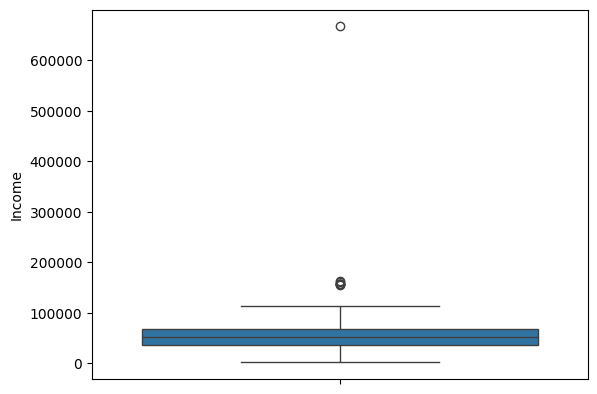

In [71]:
sns.boxplot(mkt_df['Income'])

In [72]:
mkt_df.drop(2233, inplace=True)

<Axes: ylabel='Income'>

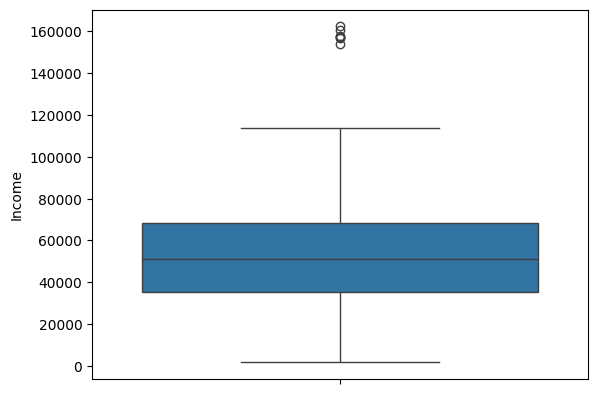

In [73]:
sns.boxplot(mkt_df['Income'])

## 결측치 처리

In [74]:
mkt_df.isna().mean()

,0
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,0.010733
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000


In [75]:
mkt_df.dropna(inplace=True)

## 시간데이터 변환

In [79]:
mkt_df['Dt_Customer'] = pd.to_datetime(mkt_df['Dt_Customer'], format='%d-%m-%Y')

In [80]:
mkt_df['Dt_Customer']

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19
...,...
2235,2013-06-13
2236,2014-06-10
2237,2014-01-25
2238,2014-01-24


In [88]:
mkt_df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [90]:
mkt_df['cust_age'] = mkt_df['Dt_Customer'].max().year*12+6 - mkt_df['Dt_Customer'].dt.year * 12 + mkt_df['Dt_Customer'].dt.month

In [91]:
mkt_df.drop('Dt_Customer', axis = 1, inplace=True)

In [99]:
mkt_df.columns.to_list()

['Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Complain',
 'cust_age']

In [103]:
mkt_df['Children'] = mkt_df[['Kidhome',
 'Teenhome']].sum(axis=1)

In [104]:
mkt_df['Children']

,Children
0,0
1,2
2,0
3,1
4,1
...,...
2235,1
2236,3
2237,0
2238,1


In [102]:
mkt_df['Total_mnt'] = mkt_df[['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']].sum(axis=1)

In [105]:
mkt_df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,857
Together,571
Single,470
Divorced,231
Widow,76
Alone,3
Absurd,2
YOLO,2


In [108]:
mkt_df['Marital_Status'] = mkt_df['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Absurd': 'Single',
    'Widow': 'Single',
    'YOLO': 'Single',
    'Divorced': 'Single',
    'Single': 'Single'
})

In [109]:
mkt_df['Education'].value_counts()

,count
Education,
Graduation,1115
PhD,480
Master,365
2n Cycle,198
Basic,54


In [112]:
mkt_df['Education'] = mkt_df['Education'].replace({
    'Basic':'Undergraduate',
    '2n Cycle':'Undergraduate',
    'Graduation':'Graduate',
    'Master':'Postgraduate',
    'PhD':'Postgraduate'
})

In [113]:
mkt_df['Education'].value_counts()

,count
Education,
Graduate,1115
Postgraduate,845
Undergraduate,252


In [114]:
mkt_df.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

## 더미 변수 변환

In [116]:
mkt_df = pd.get_dummies(mkt_df, columns = ['Education', 'Marital_Status'])

In [118]:
mkt_df.head()

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,cust_age,Total_mnt,Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_Partner,Marital_Status_Single
0,1957,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,0,39,32,0,True,False,False,False,False,True
1,1954,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,0,9,11,2,True,False,False,False,False,True
2,1965,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,0,26,25,0,True,False,False,False,True,False
3,1984,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,0,8,14,1,True,False,False,False,True,False
4,1981,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,0,7,24,1,False,True,False,False,True,False


## 스케일링

In [119]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

ss = StandardScaler()
rs = RobustScaler()
ms = MinMaxScaler()

In [126]:
ss_df = pd.DataFrame(ss.fit_transform(mkt_df), columns=mkt_df.columns)

In [127]:
rs_df = pd.DataFrame(rs.fit_transform(mkt_df), columns=mkt_df.columns)

In [128]:
ms_df = pd.DataFrame(ms.fit_transform(mkt_df), columns=mkt_df.columns)

In [130]:
round(ss_df.describe())

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,cust_age,Total_mnt,Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_Partner,Marital_Status_Single
count,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0,2212.0
mean,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.0,-2.0,-2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,-2.0,-0.0,-2.0,-3.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0
25%,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0,-1.0,-1.0,-0.0,-0.0,-1.0,-1.0
50%,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,-1.0,-0.0,-0.0,1.0,-1.0
75%,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,-0.0,1.0,1.0,0.0,1.0,1.0,-0.0,-0.0,1.0,1.0
max,2.0,5.0,2.0,4.0,4.0,7.0,4.0,6.0,5.0,7.0,8.0,9.0,2.0,6.0,10.0,2.0,4.0,3.0,1.0,1.0,3.0,27.0,1.0,1.0


In [133]:
round(rs_df.describe(),2)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,cust_age,Total_mnt,Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_Partner,Marital_Status_Single
count,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.0,2212.00,2212.00,2212.00,2212.00,2212.00
mean,-0.06,0.02,0.00,0.27,0.59,0.46,0.55,0.60,0.41,0.16,0.02,0.17,0.16,-0.17,0.01,0.01,0.11,-0.05,-0.5,0.38,0.11,0.00,-0.35,0.35
std,0.65,0.65,0.58,0.70,1.28,1.04,1.17,1.28,1.10,0.96,0.69,0.73,0.65,0.61,0.09,0.98,0.66,0.75,0.5,0.49,0.32,0.04,0.48,0.48
min,-1.67,-1.49,-0.98,-0.36,-0.26,-0.31,-0.26,-0.25,-0.52,-1.00,-1.00,-0.50,-1.00,-1.50,0.00,-1.55,-1.73,-1.00,-1.0,0.00,0.00,0.00,-1.00,0.00
25%,-0.61,-0.49,-0.50,-0.31,-0.19,-0.24,-0.19,-0.22,-0.33,-0.50,-0.50,-0.50,-0.40,-0.75,0.00,-0.45,-0.45,-1.00,-1.0,0.00,0.00,0.00,-1.00,0.00
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
75%,0.39,0.51,0.50,0.69,0.81,0.76,0.81,0.78,0.67,0.50,0.50,0.50,0.60,0.25,0.00,0.55,0.55,0.00,0.0,1.00,0.00,0.00,0.00,1.00
max,1.44,3.34,1.00,2.74,6.16,7.66,5.26,7.94,6.31,6.50,5.75,6.50,1.60,3.50,1.00,1.64,2.45,2.00,0.0,1.00,1.00,1.00,0.00,1.00


In [134]:
round(ms_df.describe(),2)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,cust_age,Total_mnt,Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_Partner,Marital_Status_Single
count,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.00,2212.0,2212.00,2212.00,2212.00,2212.00,2212.00
mean,0.52,0.31,0.50,0.20,0.13,0.10,0.15,0.10,0.14,0.15,0.15,0.10,0.45,0.27,0.01,0.49,0.44,0.32,0.5,0.38,0.11,0.00,0.65,0.35
std,0.21,0.13,0.29,0.23,0.20,0.13,0.21,0.16,0.16,0.13,0.10,0.10,0.25,0.12,0.09,0.31,0.16,0.25,0.5,0.49,0.32,0.04,0.48,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,0.34,0.21,0.24,0.02,0.01,0.01,0.01,0.00,0.03,0.07,0.07,0.00,0.23,0.15,0.00,0.34,0.30,0.00,0.0,0.00,0.00,0.00,0.00,0.00
50%,0.54,0.31,0.49,0.12,0.04,0.04,0.05,0.03,0.08,0.13,0.15,0.07,0.38,0.30,0.00,0.49,0.41,0.33,1.0,0.00,0.00,0.00,1.00,0.00
75%,0.66,0.42,0.75,0.34,0.17,0.13,0.19,0.13,0.17,0.20,0.22,0.14,0.62,0.35,0.00,0.66,0.54,0.33,1.0,1.00,0.00,0.00,1.00,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00


## 모델링

In [136]:
inertia_list = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(ms_df)
    inertia_list.append(km.inertia_)

<Axes: >

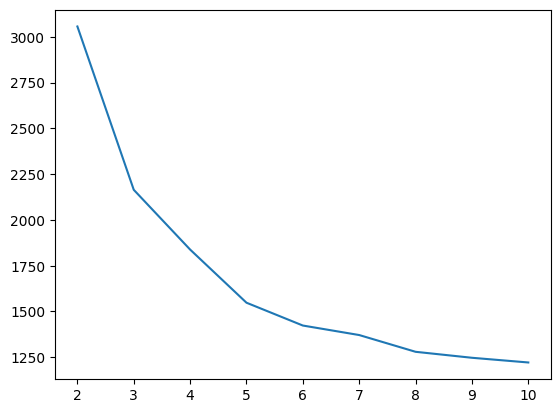

In [138]:
sns.lineplot(x=range(2, 11), y=inertia_list)

## 실루엣 스코어

In [139]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=100)
    km.fit(ms_df)
    pred = km.predict(ms_df)
    score = silhouette_score(ms_df, pred)
    scores.append(score)

In [140]:
scores

[0.20096843047231874,
 0.2820530155565727,
 0.326862897136947,
 0.3769816330962054,
 0.318349264043096,
 0.2960384884439364,
 0.2613077804330947,
 0.24134998667855553,
 0.22367881554073588]

<Axes: >

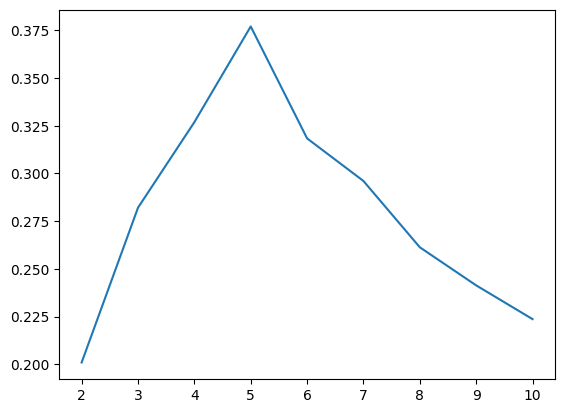

In [141]:
sns.lineplot(x=range(2, 11), y=scores)

In [143]:
km = KMeans(n_clusters=5, random_state=100)
km.fit(ms_df)
pred = km.predict(ms_df)

In [144]:
pred

array([1, 1, 2, ..., 1, 0, 0], dtype=int32)

In [145]:
mkt_df['label'] = pred

In [146]:
mkt_df['label'].value_counts()

,count
label,
2,714
0,547
1,401
3,298
4,252


In [147]:
round(mkt_df.groupby('label').mean(),2)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,cust_age,Total_mnt,Children,Education_Graduate,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_Partner,Marital_Status_Single
label,,,,,,,,,,,,,,,,,,,,,,,,
0,1966.56,55263.77,48.63,372.56,20.24,162.03,26.19,19.52,33.17,2.44,4.21,2.83,5.97,5.24,0.00,23.45,20.70,1.02,0.0,1.0,0.0,0.0,1.00,0.00
1,1969.79,52661.55,51.24,279.21,33.27,183.78,44.00,31.55,50.91,2.26,4.00,2.84,5.77,5.25,0.01,24.24,20.11,0.87,1.0,0.0,0.0,0.0,0.00,1.00
2,1969.54,51893.54,49.15,288.71,29.53,178.72,43.14,31.18,50.61,2.34,4.18,2.69,5.89,5.31,0.01,23.99,20.40,0.97,1.0,0.0,0.0,0.0,1.00,0.00
3,1966.42,53718.06,46.95,378.75,21.05,174.23,33.54,22.28,39.90,2.29,4.35,2.72,6.03,5.24,0.01,24.27,20.63,0.95,0.0,1.0,0.0,0.0,0.00,1.00
4,1973.79,41771.25,48.40,160.86,25.66,109.61,41.73,30.14,41.99,2.17,3.38,1.97,5.01,5.77,0.01,25.64,18.30,0.85,0.0,0.0,1.0,0.0,0.67,0.33
